In [ ]:
import pandas as pd
import seaborn as sea
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Dataframe
df=pd.read_csv("/content/DiamondsPrice.csv")
df.head(0)

,carat,cut,color,clarity,depth,table,price,x,y,z


In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

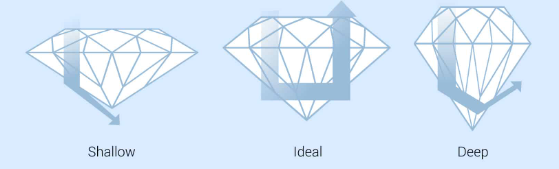<n/>

Ideal: 1, Premium: 2, Very Good: 3, Good: 4, Fair: 5

In [ ]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

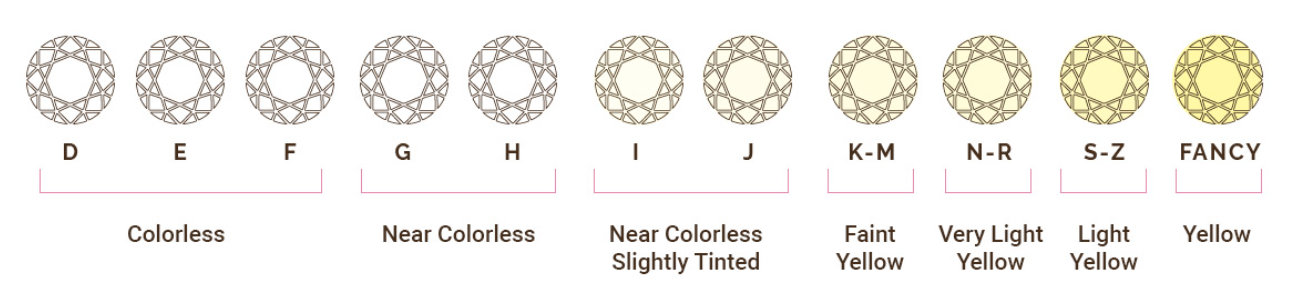

In [ ]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

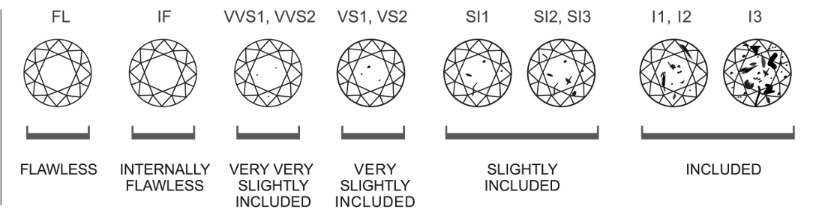

In [ ]:
# @title Create a label encoder object using scikit-learn. A tool that helps us convert categorical df into numerical format
le = LabelEncoder()

# List of categorical columns to be encoded
columns_to_encode = ['cut', 'clarity', 'color']

# Loop through each column and apply label encoding
for col in columns_to_encode:
    # Fit label encoder (object) and transform the column (method)
    df[col + '_encoded'] = le.fit_transform(df[col])

# Replacing the original categorical columns with the encoded columns
df.drop(columns_to_encode, axis=1, inplace=True)

# Print head and tail
(df)

Mapping for cut:
{'Fair': 0, 'Good': 1, 'Ideal': 2, 'Premium': 3, 'Very Good': 4}
Mapping for clarity:
{'I1': 0, 'IF': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7}
Mapping for color:
{'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}


'df.drop(columns_to_encode, axis=1, inplace=True)\n\n# Print the mapping\nfor col, mapping in columns_to_encode.items():\n    print(f"Mapping for {col}:")\n    print(mapping)'

In [ ]:
highest_price = df['price'].max()

print("Highest price:", highest_price)

Highest price: 18823


In [ ]:
# @title carat vs depth

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='table', y='carat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title price vs x

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='price', y='x', s=32, alpha=.8, c='carat')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title Display basic information about the dataset
df.info()

In [ ]:
# Rows and Columns
df.shape

(53899, 10)

In [ ]:
# Summary statistics
print(df.describe())

In [ ]:
# Check for missing values
df.isnull().sum()

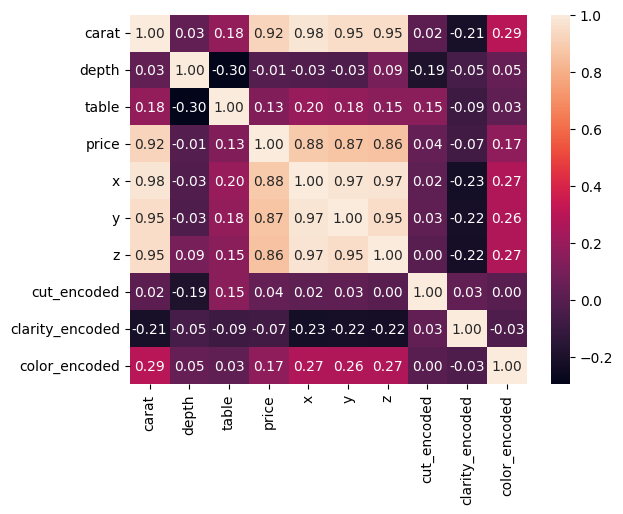

In [ ]:
# Correlation between dataset
cor = df.corr()
sea.heatmap(cor, annot=True, fmt=".2f")
plt.show()

In [ ]:
# Scatterplot
for column in df.columns:
    plt.figure()
    plt.scatter(x=range(len(df['price'])), y=df[column])
    plt.title(column)
    plt.show()

In [ ]:
# Histogram
plt.figure()
for i in df.columns:
    sea.histplot(df,x=i,kde=True)
    plt.show()